Лабораторна 7 Сеньків Маркіян ТР-31

Вимоги до завдання 1:

In [176]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
columns = ["TimesPregnant", "PlasmaGlucose", "DiastolicBP", "TricepsThickness", "SerumInsulin", "BMI", "DiabetesPedigree", "Age", "Class"]
#df = pd.read_csv('pima-indians-diabetes.data.csv',  delimiter=',', names = columns)
df = pd.read_csv('pima-indians-diabetes.data.csv',  delimiter=',')


In [177]:
# Розбиття даних на тренувальну і валідаційну вибірки
train_data, test_data = train_test_split(df, test_size=0.30, random_state=42)

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.iloc[:, :-1])
test_scaled = scaler.transform(test_data.iloc[:, :-1])

# Отримані нормалізовані тренувальні та тестові вибірки
X_train = pd.DataFrame(train_scaled, columns=train_data.columns[:-1])
X_test = pd.DataFrame(test_scaled, columns=test_data.columns[:-1])
y_train = train_data.iloc[:, -1]
y_test = test_data.iloc[:, -1]

In [178]:
#Розділяємо стовпці даних на вхідні та вихідні змінні
X = train_data.iloc[:, 0:8]
y = train_data.iloc[:, 8]

#дані перетворюємо на тензори PyTorch
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32).reshape(-1, 1)

In [179]:
# Визначення моделі
model = nn.Sequential   (
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

In [180]:
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Навчання моделі
n_epochs = 100
batch_size = 10

# Навчальний цикл
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

# Оцінка моделі
with torch.no_grad():
    y_pred = model(X)

accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Finished epoch 0, latest loss 0.8393694758415222
Finished epoch 1, latest loss 0.7238348126411438
Finished epoch 2, latest loss 0.6921213269233704
Finished epoch 3, latest loss 0.6779698729515076
Finished epoch 4, latest loss 0.672190248966217
Finished epoch 5, latest loss 0.6701488494873047
Finished epoch 6, latest loss 0.6718320846557617
Finished epoch 7, latest loss 0.6731154918670654
Finished epoch 8, latest loss 0.6721356511116028
Finished epoch 9, latest loss 0.6738513112068176
Finished epoch 10, latest loss 0.6731801629066467
Finished epoch 11, latest loss 0.6740829348564148
Finished epoch 12, latest loss 0.6746475100517273
Finished epoch 13, latest loss 0.6759126782417297
Finished epoch 14, latest loss 0.6776160597801208
Finished epoch 15, latest loss 0.6768419742584229
Finished epoch 16, latest loss 0.677117645740509
Finished epoch 17, latest loss 0.678107738494873
Finished epoch 18, latest loss 0.6803756356239319
Finished epoch 19, latest loss 0.6787214875221252
Finished epoc

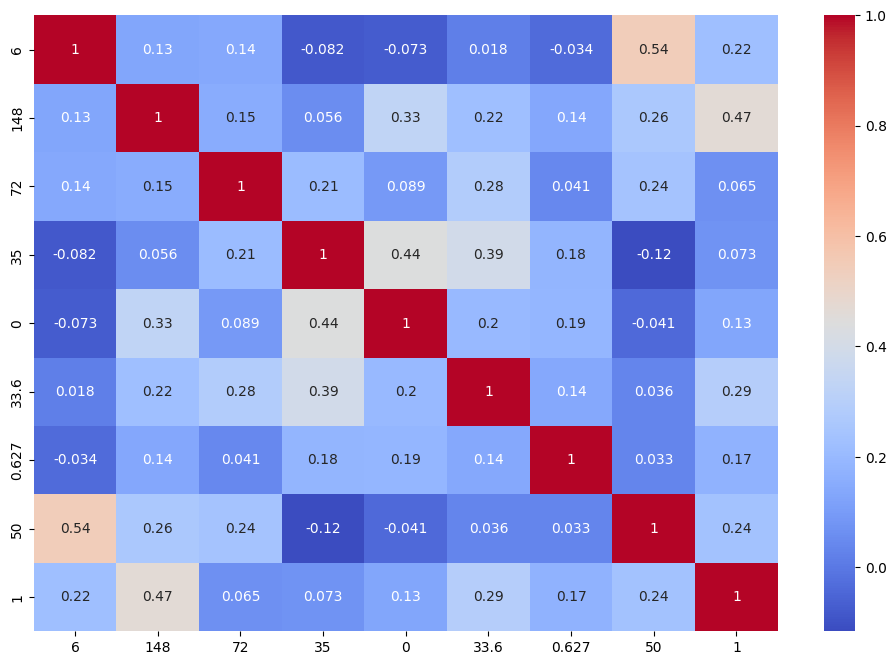

In [181]:
# Кореляційна матриця
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Вимоги до завдання 2:

In [187]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

columna = ["Time", "X", "Y", "Z"]
dfFootAccelerometer = pd.read_csv('foot-accelerometer.data.csv', names = columna)
dfFootGyroscope = pd.read_csv('foot-gyroscope.data.csv', names = columna)
dfRunAccelerometer = pd.read_csv('run-accelerometer.data.csv', names = columna)
dfRunGyroscope = pd.read_csv('run-gyroscope.data.csv', names = columna)
dfStairsAccelerometer = pd.read_csv('stairs-accelerometer.data.csv', names = columna)
dfStairsGyroscope = pd.read_csv('stairs-gyroscope.data.csv', names = columna)

# додаємо ознаку до кожного датасету
dfFootAccelerometer["Active"] = 0
dfFootGyroscope["Active"] = 0
dfRunAccelerometer["Active"] = 1
dfRunGyroscope["Active"] = 1
dfStairsAccelerometer["Active"] = 2
dfStairsGyroscope["Active"] = 2

# об'єднання датасетів
dfAccelerometer = pd.concat([dfFootAccelerometer, dfRunAccelerometer, dfStairsAccelerometer], ignore_index=True)
dfGyroscope = pd.concat([dfFootGyroscope, dfRunGyroscope, dfStairsGyroscope], ignore_index=True)

In [184]:
# Робота з даними
def workWithData(data, name):
    # Розбиття даних на тренувальну і валідаційну вибірки
    train_data, test_data = train_test_split(data, test_size=0.30, random_state=42)

    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data.iloc[:, :-1])
    test_scaled = scaler.transform(test_data.iloc[:, :-1])
    
    # Отримані нормалізовані тренувальні та тестові вибірки
    X_train = pd.DataFrame(train_scaled, columns=train_data.columns[:-1])
    X_test = pd.DataFrame(test_scaled, columns=test_data.columns[:-1])
    y_train = train_data.iloc[:, -1]
    y_test = test_data.iloc[:, -1]

    #дані перетворюємо на тензори PyTorch
    X_train_torch = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_torch = torch.tensor(y_train.values, dtype=torch.long)
    X_test_torch = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_torch = torch.tensor(y_test.values, dtype=torch.long)

    # Визначення моделі
    model = nn.Sequential(
        nn.Linear(4, 8),
        nn.ReLU(),
        nn.Linear(8, 4),
        nn.ReLU(),
        nn.Linear(4, 3)  # Output layer for 3 classes
    )
    
    # Функція для мультикласу
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Навчання моделі
    n_epochs = 100
    batch_size = 10

    # Навчальний цикл
    for epoch in range(n_epochs):
        for i in range(0, len(X_train_torch), batch_size):
            Xbatch = X_train_torch[i:i + batch_size]
            ybatch = y_train_torch[i:i + batch_size]
            y_pred = model(Xbatch)
            loss = loss_fn(y_pred, ybatch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Finished epoch {epoch}, latest loss {loss.item()}')

    # Оцінка моделі
    with torch.no_grad():
        y_pred = model(X_test_torch)
        predictions = torch.argmax(y_pred, dim=1)
        accuracy = (predictions == y_test_torch).float().mean()
    print(f"Accuracy: {accuracy.item() * 100:.2f}%")

    # Кореляційна матриця
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(name)
    plt.show()

Finished epoch 0, latest loss 1.0842334032058716
Finished epoch 1, latest loss 0.9673833847045898
Finished epoch 2, latest loss 0.8960099220275879
Finished epoch 3, latest loss 0.8647286891937256
Finished epoch 4, latest loss 0.8634693622589111
Finished epoch 5, latest loss 0.8462011218070984
Finished epoch 6, latest loss 0.8404755592346191
Finished epoch 7, latest loss 0.8388171195983887
Finished epoch 8, latest loss 0.8424884676933289
Finished epoch 9, latest loss 0.8359673619270325
Finished epoch 10, latest loss 0.8284502029418945
Finished epoch 11, latest loss 0.8136577606201172
Finished epoch 12, latest loss 0.8077256679534912
Finished epoch 13, latest loss 0.8036923408508301
Finished epoch 14, latest loss 0.7936176657676697
Finished epoch 15, latest loss 0.793475866317749
Finished epoch 16, latest loss 0.7899065613746643
Finished epoch 17, latest loss 0.7987556457519531
Finished epoch 18, latest loss 0.8029687404632568
Finished epoch 19, latest loss 0.8103432059288025
Finished ep

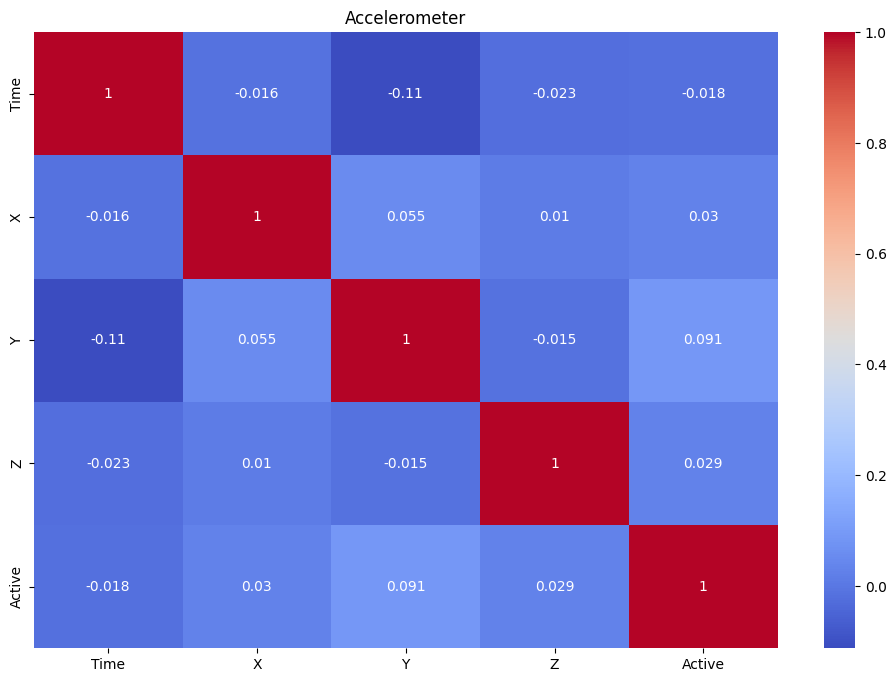

In [185]:
# Робота з даними для акселерометра
workWithData(dfAccelerometer, "Accelerometer")


Finished epoch 0, latest loss 1.0881611108779907
Finished epoch 1, latest loss 1.0030988454818726
Finished epoch 2, latest loss 0.9570568799972534
Finished epoch 3, latest loss 0.9483968615531921
Finished epoch 4, latest loss 0.9520223140716553
Finished epoch 5, latest loss 0.9652923941612244
Finished epoch 6, latest loss 0.9700769782066345
Finished epoch 7, latest loss 0.9563959836959839
Finished epoch 8, latest loss 0.9558955430984497
Finished epoch 9, latest loss 0.9458192586898804
Finished epoch 10, latest loss 0.9359928369522095
Finished epoch 11, latest loss 0.9397482872009277
Finished epoch 12, latest loss 0.9327356219291687
Finished epoch 13, latest loss 0.9247852563858032
Finished epoch 14, latest loss 0.9182377457618713
Finished epoch 15, latest loss 0.9152159094810486
Finished epoch 16, latest loss 0.917941689491272
Finished epoch 17, latest loss 0.9268941879272461
Finished epoch 18, latest loss 0.933147132396698
Finished epoch 19, latest loss 0.9462701678276062
Finished epo

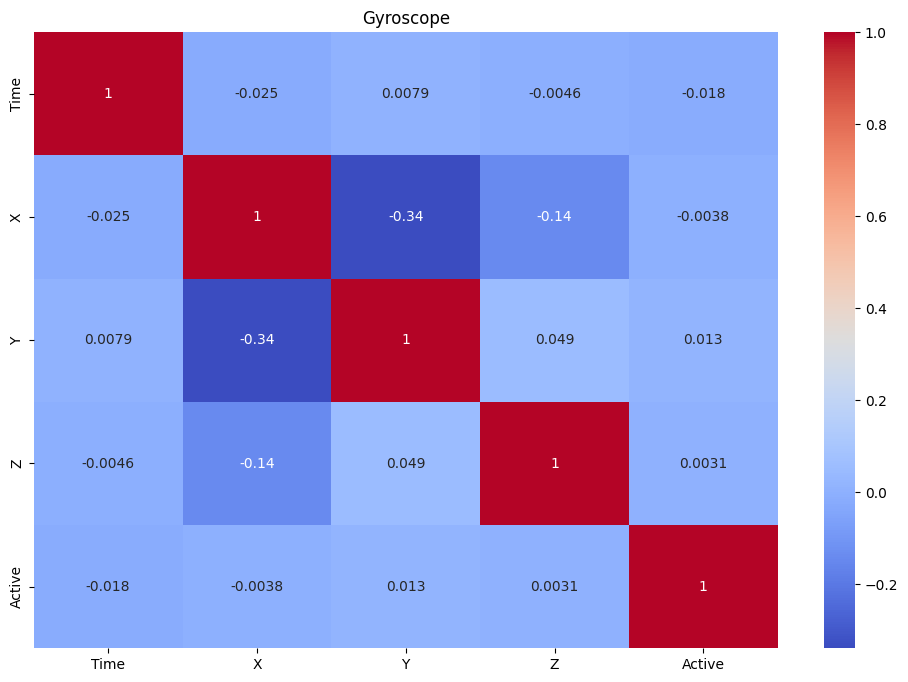

In [186]:
# Робота з даними для Гіроскопа
workWithData(dfGyroscope, "Gyroscope")